In [220]:
import json
import pandas as pd
import seaborn as sns
from pandas import Series
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize

with open('data.json','r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, meta='title', record_path=['results'])

df['year'] = df['year'].astype(int)
df['rating'] = pd.to_numeric(df['rating'])
df['metascore'] = pd.to_numeric(df['metascore'])/10
df = df[['title','year', 'rating', 'metascore', 'genre']]

In [221]:
df.head()

,title,year,rating,metascore,genre
0,The Shawshank Redemption,1994,9.3,8.1,Drama
1,The Godfather,1972,9.2,10.0,Crime Drama
2,The Dark Knight,2008,9.1,8.4,Action Crime Drama
3,The Godfather: Part II,1974,9.0,9.0,Crime Drama
4,12 Angry Men,1957,9.0,9.6,Crime Drama


# Films per Decade

Preparation and setting dataframe's content

In [222]:
s = df['genre'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del df['genre']
df2 = df.join(s)

df2 = df2.groupby(['year', 'genre'], sort=True)['year'].count()
df_year = df2.to_frame(name = 'genre count').reset_index()

df_year['decade'] = (10 * (df_year['year'] // 10)).astype(str) + 's'

df_dec = df_year.groupby(['decade', 'genre'], sort=True)['year'].count()
df_dec = df_dec.to_frame(name = 'genre count').reset_index()

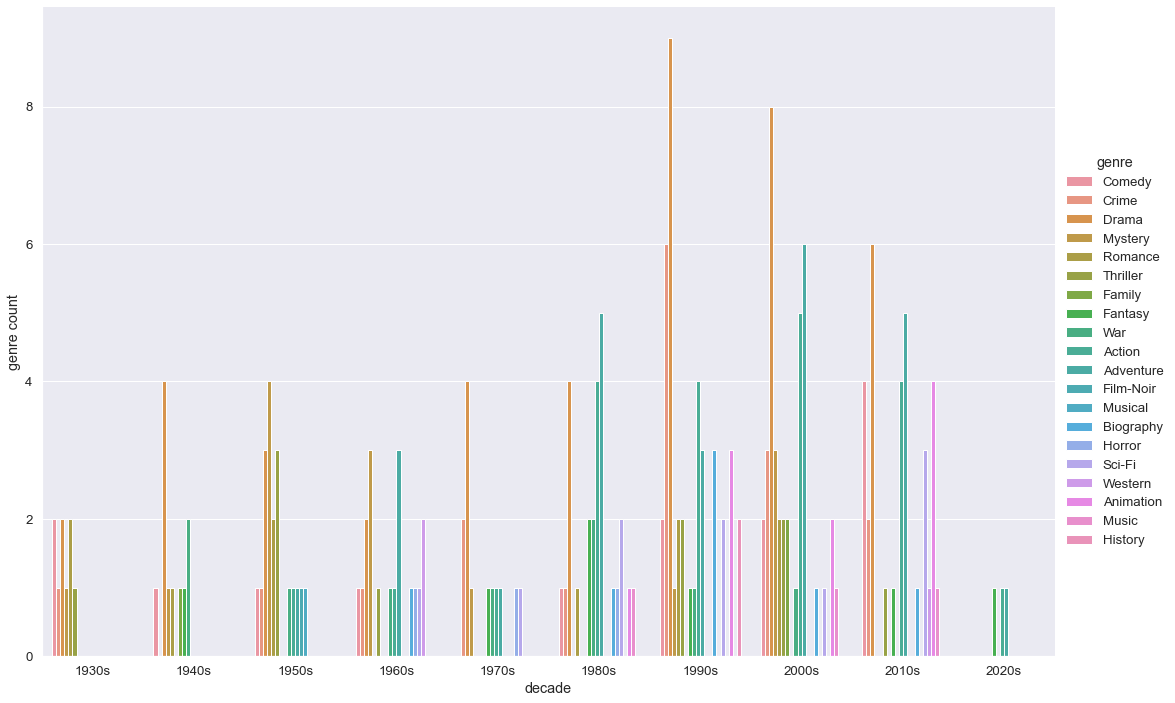

In [225]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.set_context('notebook', font_scale=1.2)
sns.set_style('darkgrid')

sns.catplot(x='decade', y='genre count', hue='genre', data=df_dec, kind='bar', height=10, aspect=15/10)
sns.despine()

    decade      genre  genre count
0    1930s     Comedy            2
1    1930s      Crime            1
2    1930s      Drama            2
3    1930s    Mystery            1
4    1930s    Romance            2
..     ...        ...          ...
96   2010s   Thriller            1
97   2010s    Western            1
98   2020s     Action            1
99   2020s  Adventure            1
100  2020s    Fantasy            1

[101 rows x 3 columns]
     year      genre  genre count decade
0    1931     Comedy            1  1930s
1    1931      Crime            1  1930s
2    1931      Drama            1  1930s
3    1931    Mystery            1  1930s
4    1931    Romance            1  1930s
..    ...        ...          ...    ...
207  2019      Drama            3  2010s
208  2019   Thriller            2  2010s
209  2021     Action            1  2020s
210  2021  Adventure            1  2020s
211  2021    Fantasy            1  2020s

[212 rows x 4 columns]


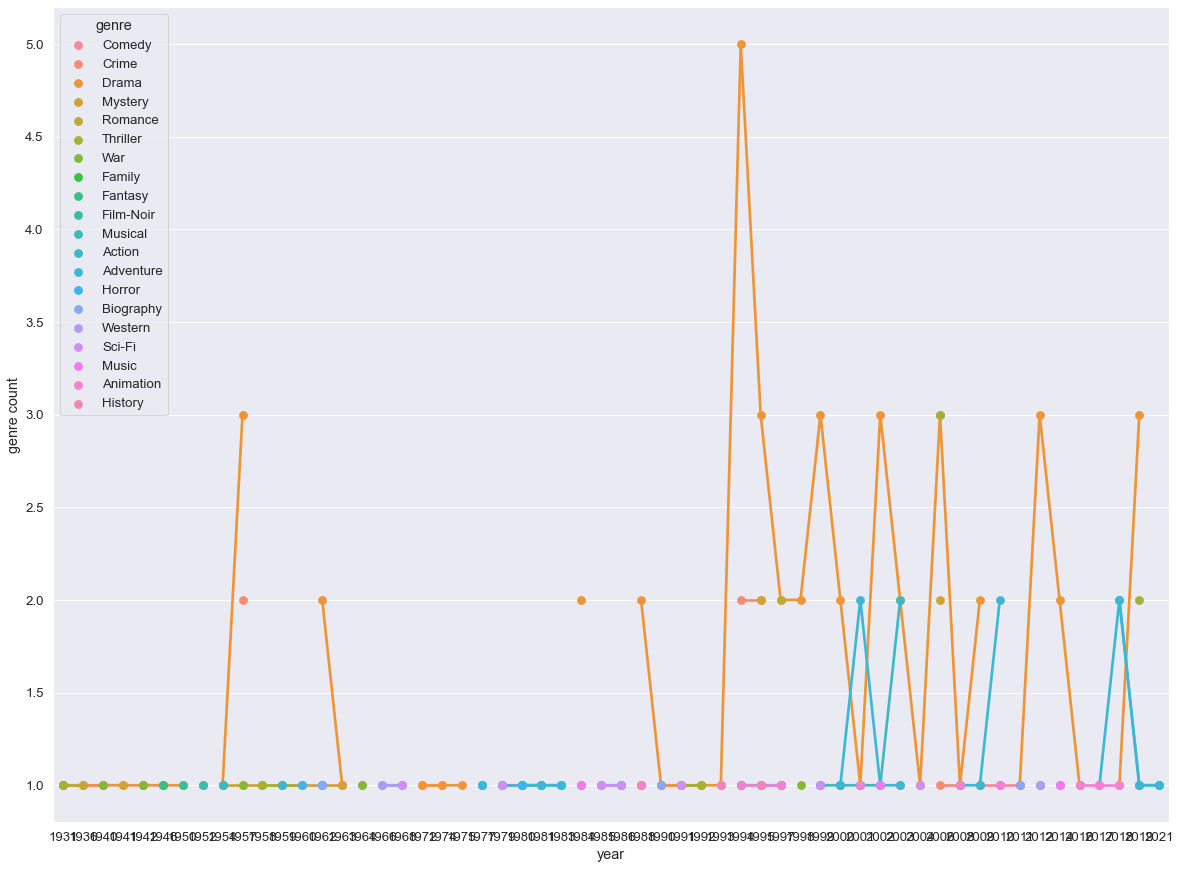

In [224]:
plt.rcParams['figure.figsize'] = (20, 15)

plot = sns.pointplot(x='year', y='genre count', hue='genre', data=df_year)
print(df_dec)
print(df_year)




Show data in function of selected genre er year

In [ ]:
plt.rcParams['figure.figsize'] = [10, 25]

df.plot(x='title', y=['metascore', 'rating'], kind='barh', align='edge', fontsize=16)

plt.show()